In [2]:
import numpy as np
import load_from_snapshot
import h5py
from matplotlib import pyplot as plt
import pickle
import os
from os import system, mkdir, chdir
from glob import glob
from os.path import isdir
import numpy as np


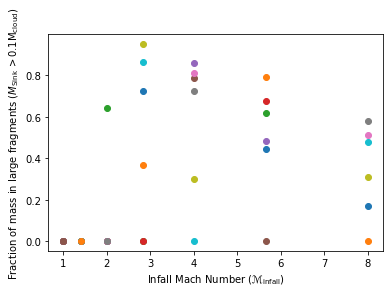

In [5]:
chdir("/home/hlane/project1Sims/allPickle")

infall_machs = np.logspace(0,3,7,base=2) # the list of infall mach #'s we want - ranges from 1 to 8, evenly spaced in log space (each is a certain % larger than the last, in a geometric progression)
alphas = 0, 0.5, 1, 2, 4, 8 #list of turbulent virial parameters we want - 0 is no initial turbulence
mus = 4, #np.inf, 4, 2, 1, 0.5, 0.25  # list of mass-to-flux ratios (greek letter mu) that we want - infinity is no magnetic field, ~0 is very strong magnetic field
seeds = 42, #42, 2, 3 # different initial turbulent seed fields - so that we try a few different random samplings of the initial turbulence to make sure results are not a fluke
sol_fracs = 0.5,  # 0, 1 # fraction of turbulent field in solenoidal modes 

for infall_mach in infall_machs:
    for alpha in alphas:
        for mu in mus:
            for seed in seeds:                
                for sol_frac in sol_fracs:
                    Ngas = max(100 * infall_mach**4, 10000)
                    run_name = "mach%g_alpha%g_mu%g_sol%g_Res%d_%d"%(round(infall_mach,2), round(alpha,2), round(mu,2), sol_frac, round(Ngas**(1./3)), seed) # this will be the unique identifier for the run - will want to create a new directory with this name
                    F=open(run_name + '.pickle', "rb")
                    temp = pickle.load(F)
                    tenPercentFractionDict = temp[0]
                    MachDict = temp[1]
                    numTot = temp[2]

                    for i in range(numTot,numTot+1):
                        plt.scatter(MachDict[run_name][i],tenPercentFractionDict[run_name][i])
                    F.close()
plt.xlabel("Infall Mach Number " + r"($ℳ_{\rm infall}\rm$)")
plt.ylabel("Fraction of mass in large fragments (" + r"$M_{\rm Sink}\, \rm > 0.1M_{\rm cloud}$)")
plt.show()